In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly 
import plotly.express as px

In [2]:
df = pd.read_csv('spotify_2015To2020.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11845 entries, 0 to 11844
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           11845 non-null  float64
 1   year              11845 non-null  int64  
 2   acousticness      11845 non-null  float64
 3   artists           11845 non-null  object 
 4   danceability      11845 non-null  float64
 5   duration_ms       11845 non-null  int64  
 6   energy            11845 non-null  float64
 7   explicit          11845 non-null  int64  
 8   id                11845 non-null  object 
 9   instrumentalness  11845 non-null  float64
 10  key               11845 non-null  int64  
 11  liveness          11845 non-null  float64
 12  loudness          11845 non-null  float64
 13  mode              11845 non-null  int64  
 14  name              11845 non-null  object 
 15  popularity        11845 non-null  int64  
 16  release_date      11845 non-null  object

**Observation** - There are no nulls in the dataset. Perfect!

In [4]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.518,2015,0.00543,['BØRNS'],0.611,218107,0.797,0,2GiJYvgVaD2HtM8GqD9EgQ,0.001370,6,0.2600,-7.627,0,Electric Love,87,2015-10-16,0.0533,120.041
1,0.337,2015,0.06780,['The Neighbourhood'],0.588,260173,0.521,0,5E30LdtzQTGqRvNd7l6kG5,0.149000,10,0.1230,-9.461,1,Daddy Issues,86,2015-10-30,0.0329,85.012
2,0.785,2015,0.01150,['Tame Impala'],0.640,216320,0.740,1,6K4t31amVTZDgR3sKmwUJJ,0.006780,4,0.1670,-4.083,1,The Less I Know The Better,85,2015-07-17,0.0284,116.879
3,0.512,2015,0.20500,['Chris Stapleton'],0.392,293293,0.370,0,3fqwjXwUGN6vbzIwvyFMhx,0.009600,9,0.0821,-10.888,1,Tennessee Whiskey,79,2015-05-04,0.0298,48.718
4,0.672,2015,0.03710,['WILLOW'],0.764,196520,0.705,0,0y60itmpH0aPKsFiGxmtnh,0.000019,3,0.0943,-5.279,0,Wait a Minute!,83,2015-01-11,0.0278,101.003


In [5]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000
mean,0.448408,2017.535753,0.264547,0.635618,210279.055466,0.606485,0.373913,0.073590,5.229548,0.181505,-7.565385,0.614943,62.132883,0.117269,120.458513
std,0.232382,1.705775,0.284156,0.171720,59981.407318,0.208396,0.483861,0.227635,3.598858,0.146782,4.720555,0.486629,16.222113,0.117367,30.737842
min,0.000000,2015.000000,0.000000,0.000000,30579.000000,0.000020,0.000000,0.000000,0.000000,0.000000,-54.837000,0.000000,0.000000,0.000000,0.000000
25%,0.268000,2016.000000,0.034300,0.535000,177200.000000,0.482000,0.000000,0.000000,2.000000,0.097700,-8.531000,0.000000,59.000000,0.039900,96.795000
50%,0.434000,2018.000000,0.150000,0.654000,205394.000000,0.627000,0.000000,0.000000,5.000000,0.121000,-6.516000,1.000000,64.000000,0.063800,120.056000
75%,0.617000,2019.000000,0.417000,0.761000,234615.000000,0.757000,1.000000,0.000353,8.000000,0.213000,-5.021000,1.000000,70.000000,0.152000,140.992000
max,0.993000,2020.000000,0.996000,0.985000,820853.000000,1.000000,1.000000,1.000000,11.000000,0.987000,1.023000,1.000000,100.000000,0.918000,220.099000


In [6]:
#Convert Milli secs duration into minutes
df['duration_min'] = df['duration_ms']/60000
df['duration_min'] = df['duration_min'].round(2)
df['duration_min']

0        3.64
1        4.34
2        3.61
3        4.89
4        3.28
         ... 
11840    5.03
11841    2.51
11842    3.52
11843    5.62
11844    3.16
Name: duration_min, Length: 11845, dtype: float64

In [7]:
#Remove the Square Brackets from the artists
df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")

df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min
0,0.518,2015,0.00543,BØRNS,0.611,218107,0.797,0,2GiJYvgVaD2HtM8GqD9EgQ,0.001370,6,0.2600,-7.627,0,Electric Love,87,2015-10-16,0.0533,120.041,3.64
1,0.337,2015,0.06780,The Neighbourhood,0.588,260173,0.521,0,5E30LdtzQTGqRvNd7l6kG5,0.149000,10,0.1230,-9.461,1,Daddy Issues,86,2015-10-30,0.0329,85.012,4.34
2,0.785,2015,0.01150,Tame Impala,0.640,216320,0.740,1,6K4t31amVTZDgR3sKmwUJJ,0.006780,4,0.1670,-4.083,1,The Less I Know The Better,85,2015-07-17,0.0284,116.879,3.61
3,0.512,2015,0.20500,Chris Stapleton,0.392,293293,0.370,0,3fqwjXwUGN6vbzIwvyFMhx,0.009600,9,0.0821,-10.888,1,Tennessee Whiskey,79,2015-05-04,0.0298,48.718,4.89
4,0.672,2015,0.03710,WILLOW,0.764,196520,0.705,0,0y60itmpH0aPKsFiGxmtnh,0.000019,3,0.0943,-5.279,0,Wait a Minute!,83,2015-01-11,0.0278,101.003,3.28


**Drop** **Duplicates**

In [8]:
df.duplicated().any().sum()

0

**Observation** - There are not any duplicates in the data set because of the unique id feature.Let's see if we remove this are there any duplicates

In [9]:
df = df.drop(labels=['id', 'release_date'], axis=1)
df.shape


(11845, 18)

In [10]:
df.duplicated().sum()

48

**Observation** - After the Unique features removal, there are 48 duplicates found in the dataset which needs to be removed

In [11]:
df = df[~df.duplicated()==1]
df.shape

(11797, 18)

In [12]:
df.duplicated().sum()

0

In [13]:
df.duration_min.sum()/(24*365*60)

0.07866316590563166

**Observation** - Spotify has 24.47 days of music or 0.078 year of continous listening. In other words it will take 0.078 years for you to listen to all the songs in the period 2015-2020.

In [14]:
#Drop the columns
df.drop(['duration_ms'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

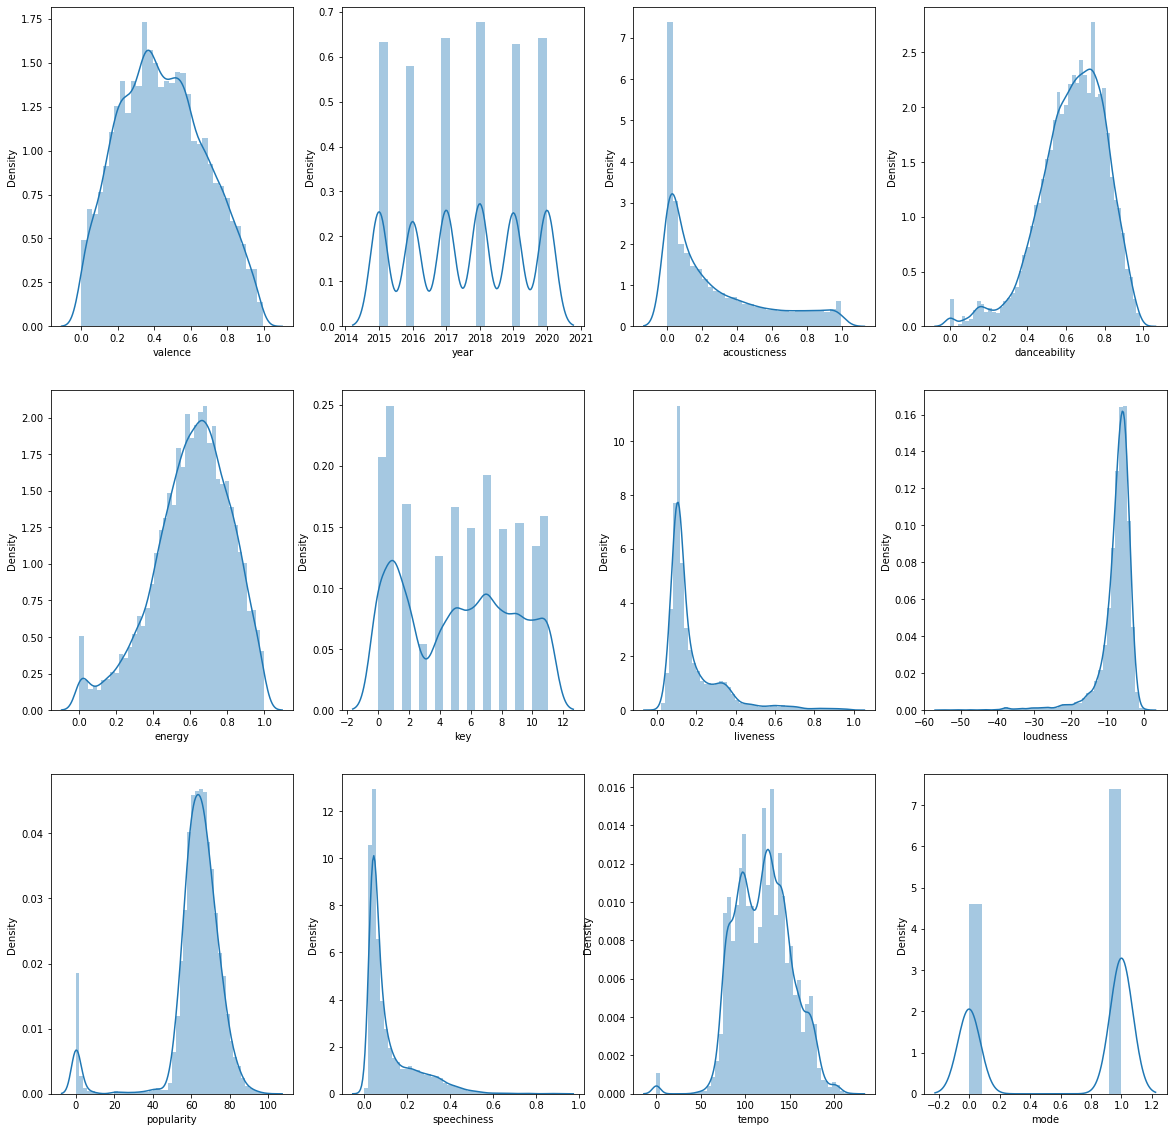

In [15]:
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(df['valence'],ax=ax[0,0])
sns.distplot(df['year'],ax=ax[0,1])
sns.distplot(df['acousticness'],ax=ax[0,2])
sns.distplot(df['danceability'],ax=ax[0,3])
#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(df['energy'],ax=ax[1,0])
sns.distplot(df['key'],ax=ax[1,1])
sns.distplot(df['liveness'],ax=ax[1,2])
sns.distplot(df['loudness'],ax=ax[1,3])
sns.distplot(df['popularity'],ax=ax[2,0])
sns.distplot(df['speechiness'],ax=ax[2,1])
sns.distplot(df['tempo'],ax=ax[2,2])
sns.distplot(df['mode'],ax=ax[2,3])

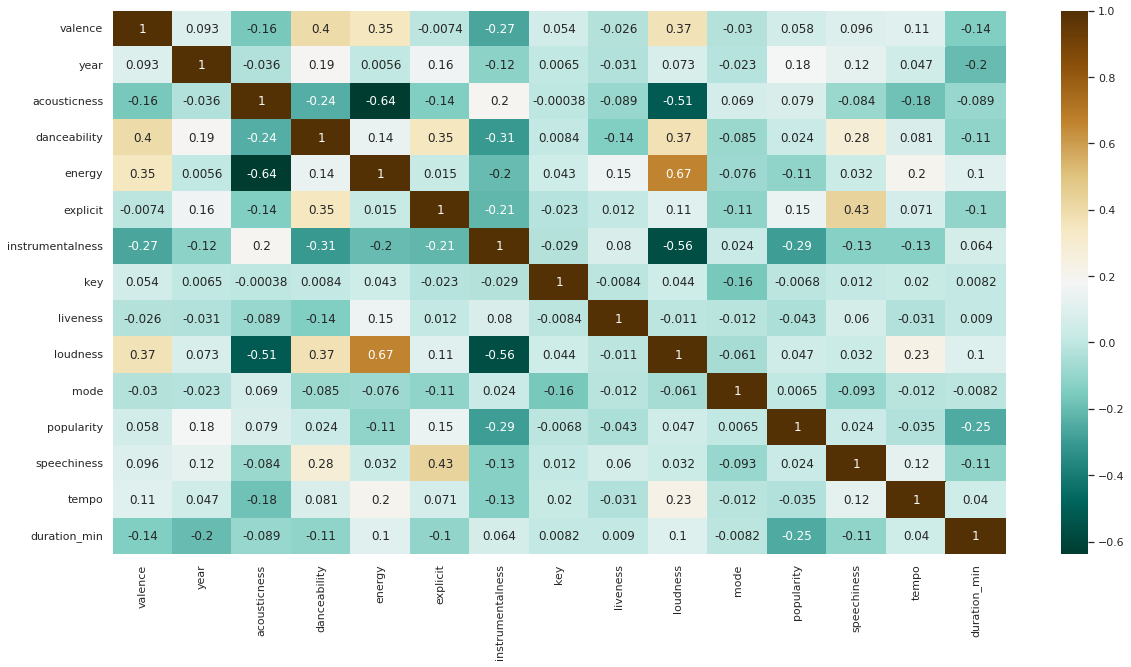

In [16]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

As you can see above, year, danceability, energy, loudness and tempo are important features for predicting popularity.

Valence and Danceability are highly related and so is speechiness and Danceability

From the above correlation table we can derive some basic insights as to what attributes make a song more popular.

1) As expected popularity is highly correlated with the year released. This makes sense as the Spotify algorithm which makes this decision generates it's "popularity" metric by not just how many streams a song receives, but also how recent those streams are.

2) Energy also seems to influence a song's popularity. Many popular songs are energetic, though not necessarily dance songs. Because the correlation here is not too high, low energy songs do have some potential to be more popular.

3) Acousticness seems to be uncorrelated with popularity. Most popular songs today have either electronic or electric instruments in them. It is very rare that a piece of music played by a chamber orchestra or purely acoustic band becomes immesely popular (though, again, not impossible).

Other things worth noting:

1) Loudness and energy are highly correlated. This makes some sense as energy is definately influence by the volume the music is being played at.

2) Acousticness is highly negatively correlated with energy, loudness, and year.

3) Valence and dancability are highly coorelated. Dance songs are usually happier and in a major key

Thus, from this data, it would be better for an artist to create a high energy song with either electric instruments or electronic songs to have the best chance at generating the most popularity.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

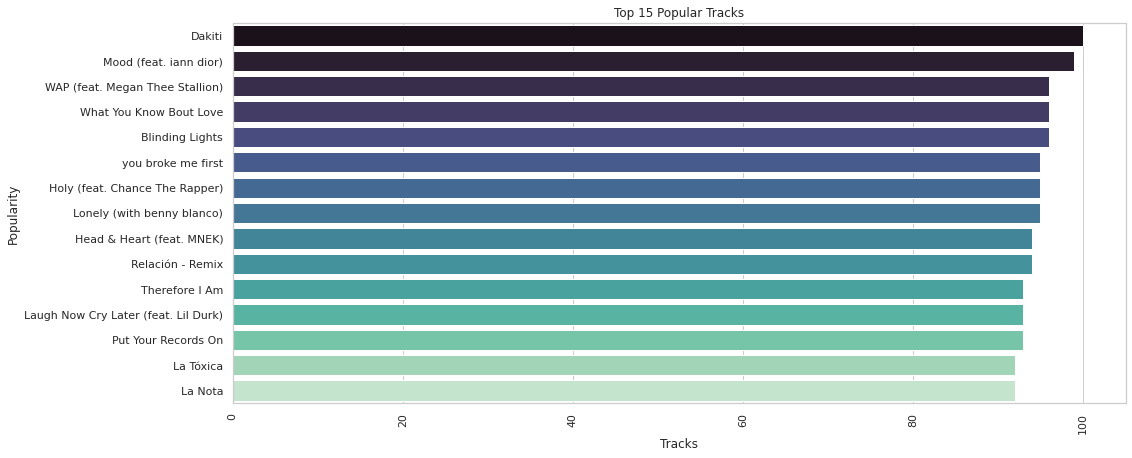

In [17]:
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [18]:
df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)

name
Dakiti                                  100.0
Mood (feat. iann dior)                   99.0
WAP (feat. Megan Thee Stallion)          96.0
What You Know Bout Love                  96.0
Blinding Lights                          96.0
you broke me first                       95.0
Holy (feat. Chance The Rapper)           95.0
Lonely (with benny blanco)               95.0
Head & Heart (feat. MNEK)                94.0
Relación - Remix                         94.0
Therefore I Am                           93.0
Laugh Now Cry Later (feat. Lil Durk)     93.0
Put Your Records On                      93.0
La Tóxica                                92.0
La Nota                                  92.0
Name: popularity, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text major ticklabel objects>)

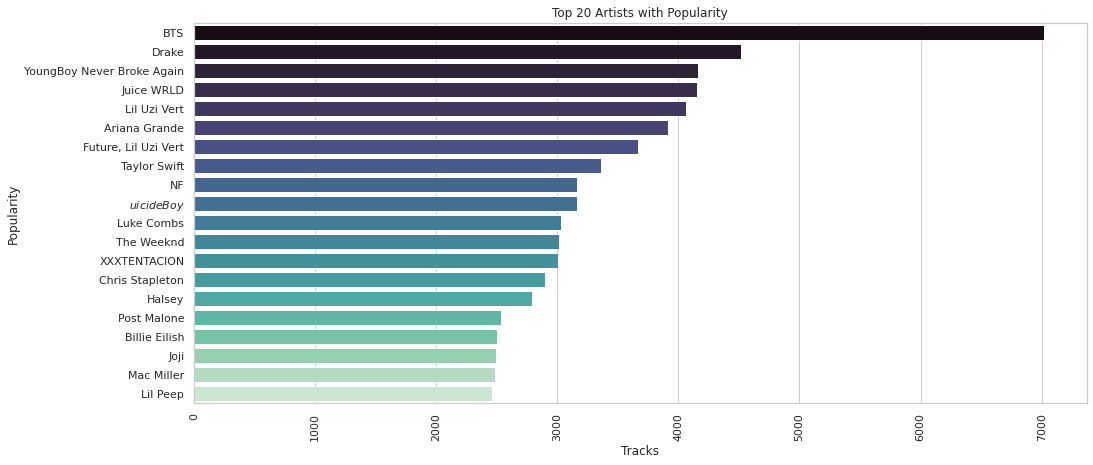

In [19]:
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

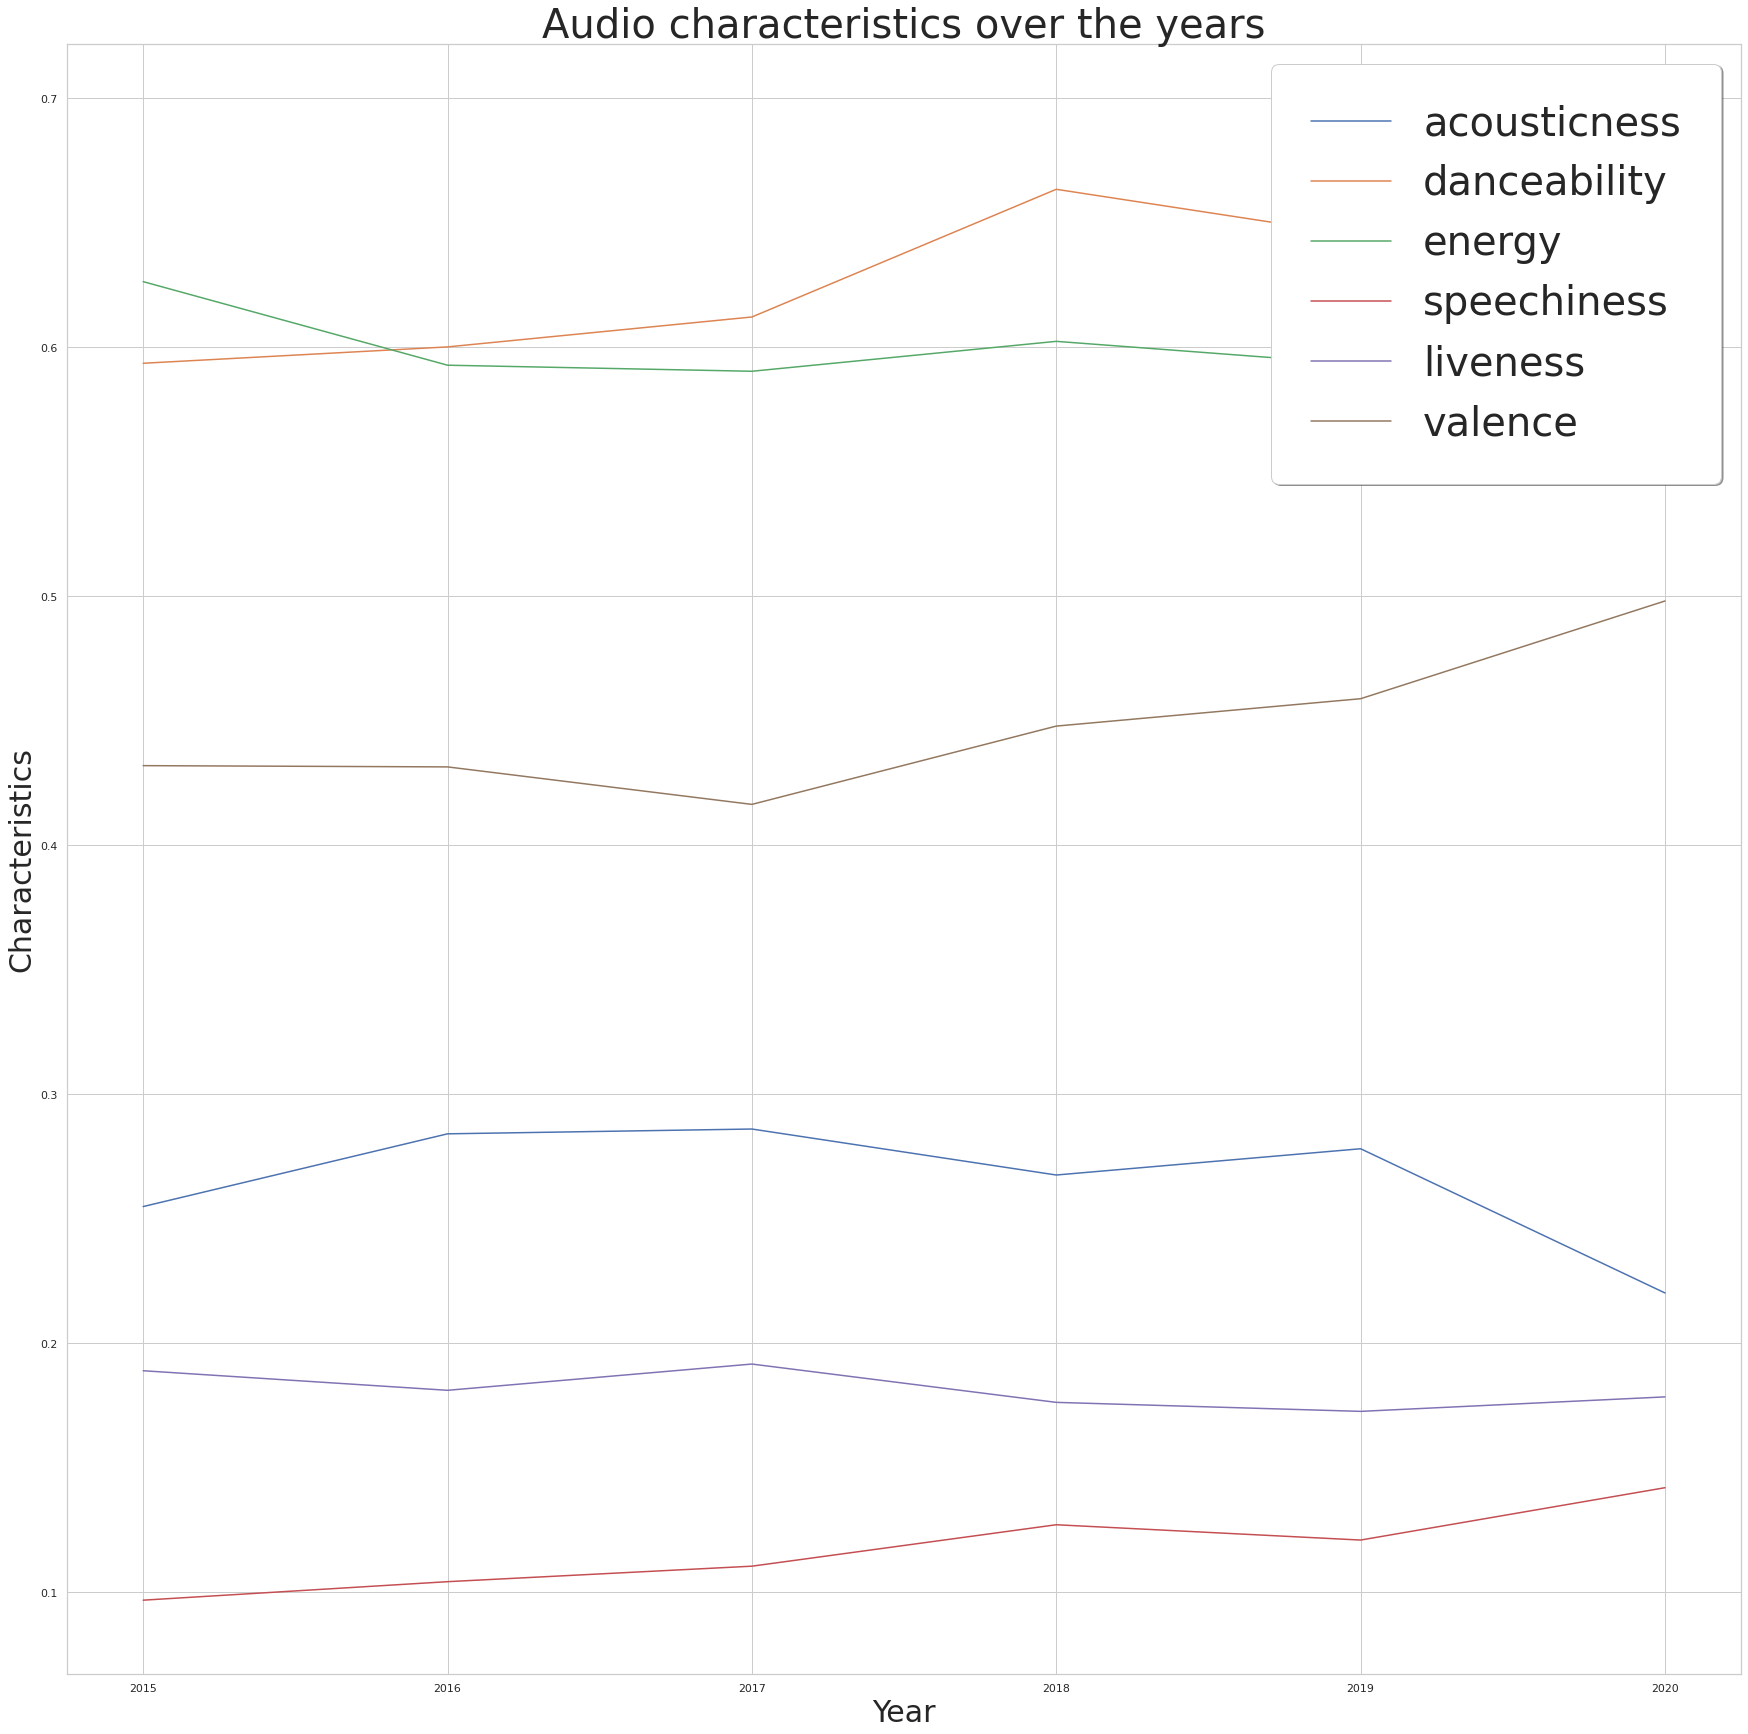

In [20]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(30,30))
for c in columns:
    x = df.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years', fontsize=40)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Characteristics',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 40}, loc = 'upper right')
plt.show()

In [ ]:
y=pd.DataFrame(df['artists'].value_counts().head()).reset_index()
y.columns=['Artists','Songs_Count']
y

,Artists,Songs_Count
0,BTS,99
1,"Future, Lil Uzi Vert",75
2,Drake,69
3,YoungBoy Never Broke Again,67
4,Lil Uzi Vert,65


Text(0, 0.5, 'Popularity')

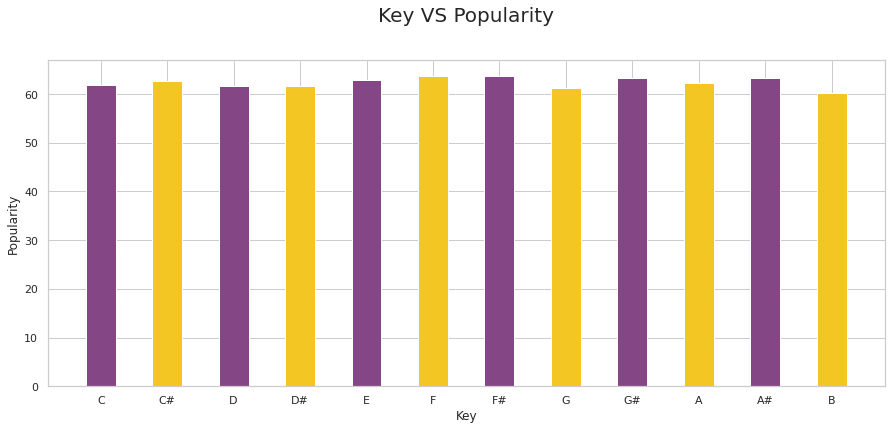

In [ ]:
keypop = pd.DataFrame(df.groupby('key')['popularity'].mean()).reset_index()
keypop.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)

fig = plt.figure(figsize=(15,6))
plt.bar( keypop['key'],
         keypop['popularity'],
         width=0.45,
         color = ['#844685','#f3c623'])
plt.title('Key VS Popularity',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Popularity')
#ax.axes.get_xaxis().set_visible(True)

Text(0, 0.5, 'Frequency')

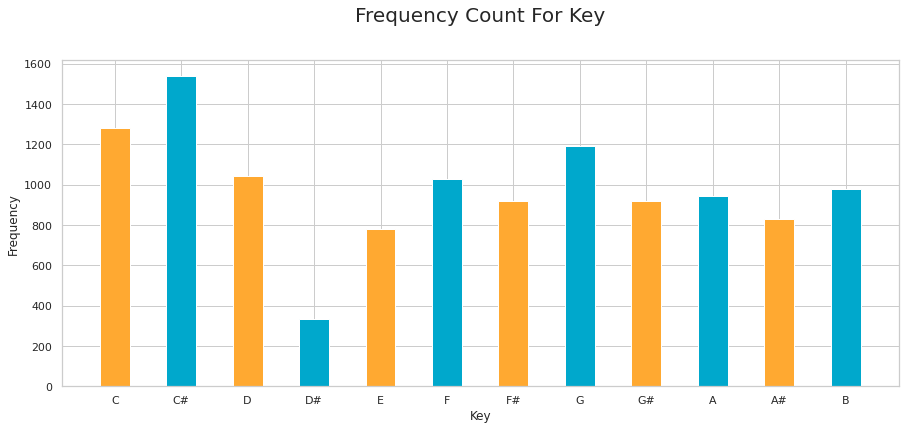

In [ ]:
key = pd.DataFrame(df['key'].value_counts()).reset_index().sort_values('index')
key.replace({'index' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)
fig = plt.figure(figsize=(15,6))
plt.bar( key['index'],
         key['key'],
         width=0.45,
         color = ['#ffa931','#00a8cc'])
plt.title('Frequency Count For Key',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Frequency')
#ax.axes.get_xaxis().set_visible(True)